In [22]:
import pandas as pd
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline  

## Read CSV into a DataFrame

In [11]:
df = pd.read_csv('charlotte_data_joined.csv')

## Check the data for missing values

In [ ]:
#check if important cols have missing values
df.isnull().any()

In [ ]:
#mainly to check that ratings are between 0 to 5. See min and max.
#no negative values except in lat and long
df.describe().T

## Convert Date to Datetime format for easy maipulation 

In [ ]:
 df['review_date'] = pd.to_datetime(df['review_date'])
df['mnth_yr'] = df['review_date'].apply(lambda x: x.strftime('%B-%Y'))
df.mnth_yr.head()

## Explore top 5 rows of data

In [ ]:
df.head().T

=====================================================================================================================

# Insights and Recommendations
## 1. Business Metrics
    - Current ratings is an overall number which could be misleading due to biased ratings. 
    - Sometimes businesses with bad ratings are improving but users dont see that. 

## For each business, display the ratings count so we know the breakdown

107

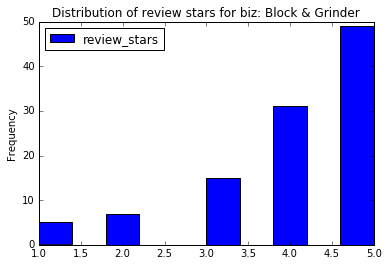

In [157]:
#example, for business with id = '--pOlFxITWnhzc7SHSIP0A', display breakdown of review star ratings
id = '--pOlFxITWnhzc7SHSIP0A'
biz_name = df.loc[df['business_id'] == id,'business_name'].iloc[0]
df.loc[df['business_id'] == id].plot.hist(y='review_stars',title='Distribution of review stars for biz: '+biz_name)
len(df.loc[df['business_id'] == id])

### Create a smaller Dataframe with only columns we need

In [167]:
df_biz = df[['business_id','review_stars','review_date','mnth_yr']]
# df_biz.sort_values('review_date',ascending =1).plot.hist( 'business_stars', by = 'review_date')
# df_biz['business_stars'].plot.hist(by = 'review_date')
df_biz.loc[df_biz['business_id'] == '0s-OY8GuWszGYSMDAMw6kQ'].T

,32799,32800,32801,32802
business_id,0s-OY8GuWszGYSMDAMw6kQ,0s-OY8GuWszGYSMDAMw6kQ,0s-OY8GuWszGYSMDAMw6kQ,0s-OY8GuWszGYSMDAMw6kQ
review_stars,5,5,5,4
review_date,2010-12-24 00:00:00,2011-03-21 00:00:00,2012-07-22 00:00:00,2014-09-08 00:00:00
mnth_yr,December-2010,March-2011,July-2012,September-2014


## Look at average ratings over time per business so we know that they could be improving or not. 

There is 1381 unique businesses. 


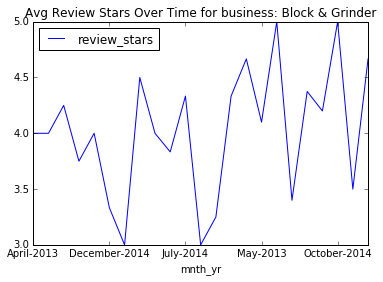

In [165]:
df2 = df_biz.groupby(['business_id','mnth_yr']).mean().reset_index()
df2.loc[df2['business_id'] == id].plot.line(x='mnth_yr',y='review_stars', title = "Avg Review Stars Over Time for business: "+ biz_name)
print "There is " + str(len(df2.business_id.unique())) + " unique businesses. "

## 2. Reviewer Metrics

## Calculate the percentage of elite yelpers who reviewed a particular business

In [204]:
df_elite = df.groupby('business_id', as_index=False)['reviewer_currently_elite'].agg({'elite': 'sum', 'total': 'count'})
df_elite.head()

In [208]:
df_elite['percent_elites'] = df_elite['elite']/df_elite['total']*100
df_elite['percent_elites'] = df_elite['percent_elites'].round()
df_elite.head()

,business_id,total,elite,percent_elites
0,--pOlFxITWnhzc7SHSIP0A,107,27,25.0
1,-1JzlIdItrARuq2JW63rKA,59,8,14.0
2,-2NCvK5807Nxs9GUb2Eo1g,15,1,7.0
3,-5As9GrKDboz5N5eA2HRuA,9,2,22.0
4,-6j-KVPPX2xKjCruNO2HnQ,35,5,14.0


In [171]:
# Create another smaller dataframe with only columns about reviewer
df_reviewer = df[['business_id','reviewer_id','reviewer_total_votes','reviewer_years_elite','reviewer_currently_elite','reviewer_average_stars','review_stars']]
df3 = df_reviewer.groupby('business_id', as_index=False)['reviewer_currently_elite'].agg({'reviewer_currently_elite': 'sum', 'total': 'count'})
df3['percent_by_current_elites'] = df3['reviewer_currently_elite']/df3['total'] *100
df3['percent_by_current_elites'] = df3['percent_by_current_elites'].round()
df_reviewer.head()

,business_id,reviewer_id,reviewer_total_votes,reviewer_years_elite,reviewer_currently_elite,reviewer_average_stars,review_stars
0,Gw5POFxBRoJxN_ZYhk6lgQ,whKpnugMnWTz3UjlrN71yg,0,3,0,3.87,4.0
1,Gw5POFxBRoJxN_ZYhk6lgQ,4522K1jh68XVpUsPh-5I7A,0,2,0,3.80,5.0
2,Gw5POFxBRoJxN_ZYhk6lgQ,FdaMP9RQHCY7WMFPq80LCg,0,5,1,3.67,4.0
3,Gw5POFxBRoJxN_ZYhk6lgQ,PM2jXrlVzik1jDwwahLJJQ,0,4,1,3.74,4.0
4,Gw5POFxBRoJxN_ZYhk6lgQ,naBs2Kg2KClrKcoRgFE2eA,0,3,0,3.69,3.0


## Rating Vs Avg Rating
- If more reviewers give a rating that is higher than the reviewer's average rating, this business could be good. 

In [179]:
#run only once. do not delete
# df_reviewer['score_gt_avg'] = df_reviewer.review_stars > df.reviewer_average_stars
# df4 = df_reviewer.groupby('business_id')['score_gt_avg'].agg([('score_gt_avg', 'sum'),('total', 'count')]).reset_index()

## Percentage of reviewers that gave a score higher than their average ratings per business

In [199]:
# df4 = df4.reset_index() ## do only once
# df4.drop('level_0',1,inplace = True) ## drop unecessary columns
df4['pct_gt_ratings'] = df4['score_gt_avg']/df4['total']*100
df4 = df4.round()
df4.head()

,business_id,score_gt_avg,total,pct_gt_ratings
0,--pOlFxITWnhzc7SHSIP0A,60.0,107,56.0
1,-1JzlIdItrARuq2JW63rKA,35.0,59,59.0
2,-2NCvK5807Nxs9GUb2Eo1g,7.0,15,47.0
3,-5As9GrKDboz5N5eA2HRuA,2.0,9,22.0
4,-6j-KVPPX2xKjCruNO2HnQ,7.0,35,20.0


=====================================================================================================================


## 3. Prepare data for Topic analysis
- Many times, reviewers give low ratings even when overall quality of a business is good. We want to understand if we can breakdown the review into Topics (E.g Service, Ambience, Food etc) so reviewers can rate on each aspect instead of overall so the business rating will not be biased. 
- Below, we will try to find out what these key aspects that we can break down the reviews into. 

## Gather all reviews with ratings < 2 stars

In [212]:
# id = 'z_V32f1tNYLXe8VD589vPg'
# low_ratings_text_biz = df.loc[(df['review_stars']) < 2 & (df['business_id'] == id), 'review_text'].values.tolist()
low_ratings_text = df.loc[(df['review_stars']) < 2, 'review_text'].values.tolist()
print low_ratings_text[:2]
print 
print "Total number of low reviews: " + str(len(low_ratings_text))

['Cream cheese skimp alert!! We pay ~$7 per smoked salmon bagel and they put the cream cheese on like people butter their toast. They have no clue what the word "toasted" means. It really is just warming the bagel. The lox bagels are not even made open face. Not going back again.', "I almost hate writing this review, because Green's is such a Charlotte institution. I almost feel like I'm dissing my adopted city by saying this, but I just don't see what the big deal is about this place. When I first moved here everyone talked about how the hot dogs were as good as The Varsity in Atlanta. News tip: they aren't, and they aren't by a longshot. What's worse, the three or four times I've eaten there the food has been lukewarm and inconsistent. Maybe the hot dog is cold, but the chili is hot. I dunno... I WANT to like this place, but just can't."]

Total number of low reviews: 3813


## Clean Text Data
- Remove stopwords
- Stem Words
- remove punctuations

In [147]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [148]:
def clean(doc):
    doc = doc.decode('utf-8')
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [149]:
doc_clean = [clean(doc).split() for doc in low_ratings_text]        

## Output a list of list of terms
- Each review is broken down into tokens with key terms

In [150]:
doc_clean[:5]

[[u'cream',
  u'cheese',
  u'skimp',
  u'alert',
  u'pay',
  u'7',
  u'per',
  u'smoked',
  u'salmon',
  u'bagel',
  u'put',
  u'cream',
  u'cheese',
  u'like',
  u'people',
  u'butter',
  u'toast',
  u'clue',
  u'word',
  u'toasted',
  u'mean',
  u'really',
  u'warming',
  u'bagel',
  u'lox',
  u'bagel',
  u'even',
  u'made',
  u'open',
  u'face',
  u'going',
  u'back',
  u'again'],
 [u'almost',
  u'hate',
  u'writing',
  u'review',
  u'green',
  u'charlotte',
  u'institution',
  u'almost',
  u'feel',
  u'like',
  u'im',
  u'dissing',
  u'adopted',
  u'city',
  u'saying',
  u'this',
  u'dont',
  u'see',
  u'big',
  u'deal',
  u'place',
  u'first',
  u'moved',
  u'everyone',
  u'talked',
  u'hot',
  u'dog',
  u'good',
  u'varsity',
  u'atlanta',
  u'news',
  u'tip',
  u'arent',
  u'arent',
  u'longshot',
  u'whats',
  u'worse',
  u'three',
  u'four',
  u'time',
  u'ive',
  u'eaten',
  u'food',
  u'lukewarm',
  u'inconsistent',
  u'maybe',
  u'hot',
  u'dog',
  u'cold',
  u'chili',
  u'

In [151]:
import gensim
from gensim import corpora

In [152]:
# Create the term dictionary of corpus, where every unique term is assigned an index.
# Converting list of documents (corpus) into Document Term Matrix using dictionary
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [134]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [213]:
#Manually set 15 topics
ldamodel = Lda(doc_term_matrix, num_topics=15, id2word = dictionary, passes=50)

In [218]:
result = ldamodel.print_topics( num_words=10)
for i,l in enumerate(result):
    print "TOPIC "+ str(i) + ":",l

TOPIC 0: (6, u'0.023*order + 0.016*customer + 0.012*it + 0.012*dont + 0.010*get + 0.010*time + 0.008*said + 0.008*place + 0.008*like + 0.007*business')
TOPIC 1: (4, u'0.013*card + 0.009*mushroom + 0.007*egg + 0.005*receipt + 0.005*juice + 0.005*credit + 0.004*sandwich + 0.004*coffee + 0.004*roach + 0.004*man')
TOPIC 2: (3, u'0.069*wing + 0.009*wild + 0.006*buffalo + 0.006*sauce + 0.006*sashimi + 0.006*sushi + 0.006*ring + 0.005*turn + 0.005*toro + 0.005*impressed')
TOPIC 3: (2, u'0.020*taco + 0.015*food + 0.015*good + 0.013*ordered + 0.012*steak + 0.011*chip + 0.010*restaurant + 0.010*shrimp + 0.009*fish + 0.009*meal')
TOPIC 4: (9, u'0.015*food + 0.015*u + 0.012*table + 0.012*minute + 0.012*time + 0.010*service + 0.010*back + 0.010*order + 0.009*get + 0.009*one')
TOPIC 5: (14, u'0.008*people + 0.008*like + 0.007*bagel + 0.007*wing + 0.007*beer + 0.006*place + 0.005*know + 0.005*better + 0.005*great + 0.005*one')
TOPIC 6: (7, u'0.017*food + 0.014*time + 0.014*place + 0.012*like + 0.011*